# Eksperimen SML - Christian Gideon Valent

Notebook ini berisi eksperimen untuk proyek Machine Learning dengan tahapan:
1. Perkenalan Dataset
2. Import Library
3. Memuat Dataset
4. Exploratory Data Analysis (EDA)
5. Data Preprocessing

---
## 1. Perkenalan Dataset

Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset:**
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle, UCI ML Repository, Open Data*) atau data primer yang Anda kumpulkan sendiri.

### Dataset yang Digunakan: Iris Dataset

| Atribut | Nilai |
|---------|-------|
| **Nama Dataset** | Iris Dataset |
| **Sumber** | scikit-learn (sklearn.datasets) |
| **Jumlah Sampel** | 150 |
| **Jumlah Fitur** | 4 |
| **Target Classes** | 3 (setosa, versicolor, virginica) |
| **Tipe Task** | Classification (Multiclass) |

### Deskripsi Fitur:
1. `sepal length (cm)` - Panjang sepal bunga
2. `sepal width (cm)` - Lebar sepal bunga
3. `petal length (cm)` - Panjang petal bunga
4. `petal width (cm)` - Lebar petal bunga

### Target Classes:
- **0**: Iris Setosa
- **1**: Iris Versicolor
- **2**: Iris Virginica

---
## 2. Import Library

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [13]:
# Library untuk manipulasi data
import numpy as np
import pandas as pd

# Library untuk visualisasi
import matplotlib.pyplot as plt
import seaborn as sns

# Library untuk machine learning
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.feature_selection import SelectKBest, f_classif

# Library untuk utilitas
import warnings
warnings.filterwarnings('ignore')

# Set style visualisasi
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('husl')

print("✅ Semua library berhasil diimpor!")

✅ Semua library berhasil diimpor!


---
## 3. Memuat Dataset

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan.

In [14]:
# Memuat dataset Iris dari sklearn
iris = load_iris()

# Konversi ke DataFrame untuk kemudahan analisis
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target
df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

# Menampilkan informasi dasar dataset
print("📊 Informasi Dataset:")
print("="*50)
print(f"Jumlah Sampel: {df.shape[0]}")
print(f"Jumlah Fitur: {df.shape[1] - 2}")
print(f"Target Classes: {list(iris.target_names)}")
print(f"Nama Fitur: {list(iris.feature_names)}")

📊 Informasi Dataset:
Jumlah Sampel: 150
Jumlah Fitur: 4
Target Classes: ['setosa', 'versicolor', 'virginica']
Nama Fitur: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [15]:
# Menampilkan 10 baris pertama dataset
print("📋 Preview Dataset (10 baris pertama):")
df.head(10)

📋 Preview Dataset (10 baris pertama):


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
5,5.4,3.9,1.7,0.4,0,setosa
6,4.6,3.4,1.4,0.3,0,setosa
7,5.0,3.4,1.5,0.2,0,setosa
8,4.4,2.9,1.4,0.2,0,setosa
9,4.9,3.1,1.5,0.1,0,setosa


In [16]:
# Menyimpan dataset mentah ke file CSV
df.to_csv('../iris_raw/iris_raw.csv', index=False)
print("✅ Dataset mentah berhasil disimpan ke 'data/raw/iris_raw.csv'")

✅ Dataset mentah berhasil disimpan ke 'data/raw/iris_raw.csv'


---
## 4. Exploratory Data Analysis (EDA)

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

### 4.1 Informasi Dataset

In [17]:
# Informasi tipe data
print("📊 Informasi Tipe Data:")
print("="*50)
df.info()

📊 Informasi Tipe Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   sepal length (cm)  150 non-null    float64 
 1   sepal width (cm)   150 non-null    float64 
 2   petal length (cm)  150 non-null    float64 
 3   petal width (cm)   150 non-null    float64 
 4   target             150 non-null    int32   
 5   species            150 non-null    category
dtypes: category(1), float64(4), int32(1)
memory usage: 5.7 KB


In [18]:
# Statistik deskriptif
print("📈 Statistik Deskriptif:")
df.describe()

📈 Statistik Deskriptif:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


### 4.2 Cek Missing Values

In [19]:
# Cek missing values
print("❓ Missing Values:")
print("="*50)
missing = df.isnull().sum()
print(missing)
print(f"\nTotal Missing Values: {df.isnull().sum().sum()}")

❓ Missing Values:
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
species              0
dtype: int64

Total Missing Values: 0


### 4.3 Cek Duplikasi Data

In [20]:
# Cek data duplikat
print("🔄 Data Duplikat:")
print("="*50)
duplicates = df.duplicated().sum()
print(f"Jumlah baris duplikat: {duplicates}")

🔄 Data Duplikat:
Jumlah baris duplikat: 1


### 4.4 Distribusi Target Class

🎯 Distribusi Target Class:
species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64


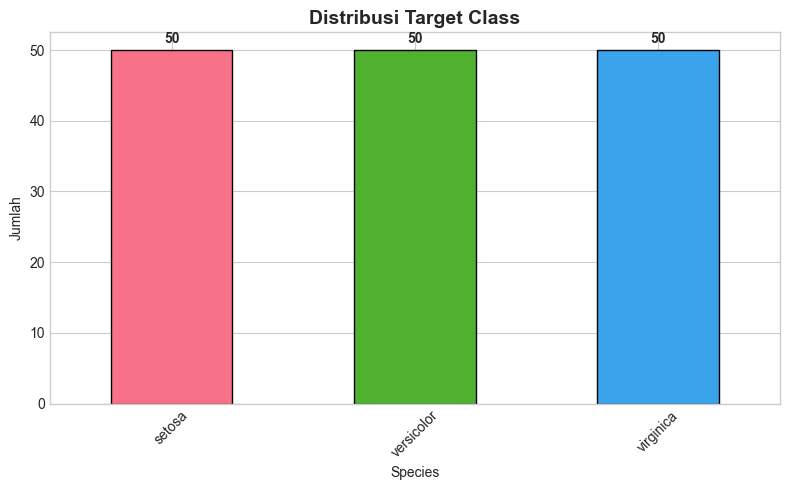

In [21]:
# Distribusi kelas target
print("🎯 Distribusi Target Class:")
print("="*50)
print(df['species'].value_counts())

# Visualisasi
fig, ax = plt.subplots(figsize=(8, 5))
colors = sns.color_palette('husl', 3)
df['species'].value_counts().plot(kind='bar', color=colors, edgecolor='black', ax=ax)
ax.set_title('Distribusi Target Class', fontsize=14, fontweight='bold')
ax.set_xlabel('Species')
ax.set_ylabel('Jumlah')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

for i, v in enumerate(df['species'].value_counts().values):
    ax.text(i, v + 1, str(v), ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

### 4.5 Distribusi Fitur

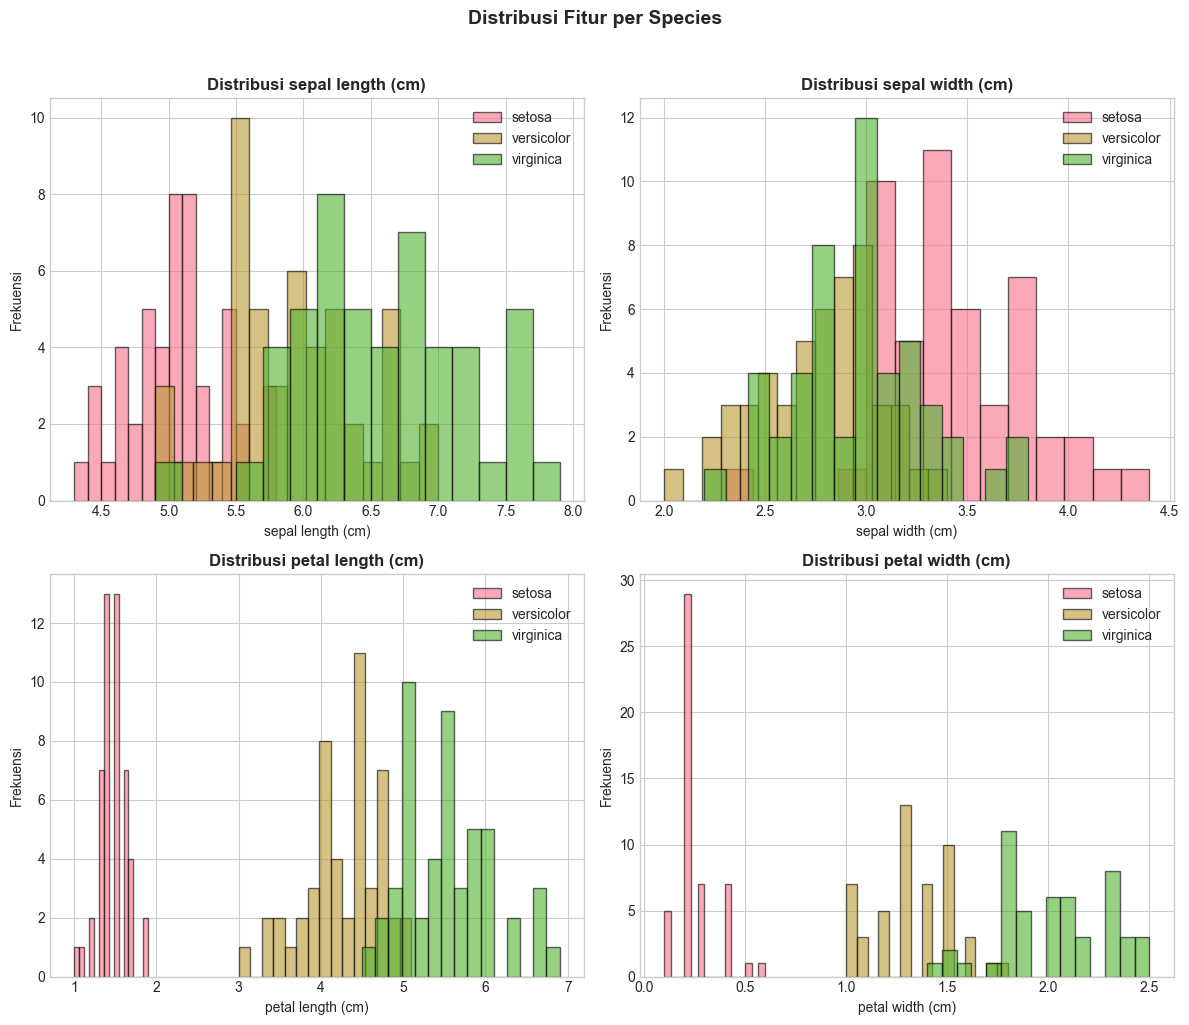

In [22]:
# Histogram distribusi setiap fitur
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

feature_cols = iris.feature_names

for idx, col in enumerate(feature_cols):
    for species in iris.target_names:
        subset = df[df['species'] == species][col]
        axes[idx].hist(subset, alpha=0.6, label=species, bins=15, edgecolor='black')
    
    axes[idx].set_title(f'Distribusi {col}', fontsize=12, fontweight='bold')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Frekuensi')
    axes[idx].legend()

plt.suptitle('Distribusi Fitur per Species', fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

### 4.6 Box Plot (Deteksi Outlier)

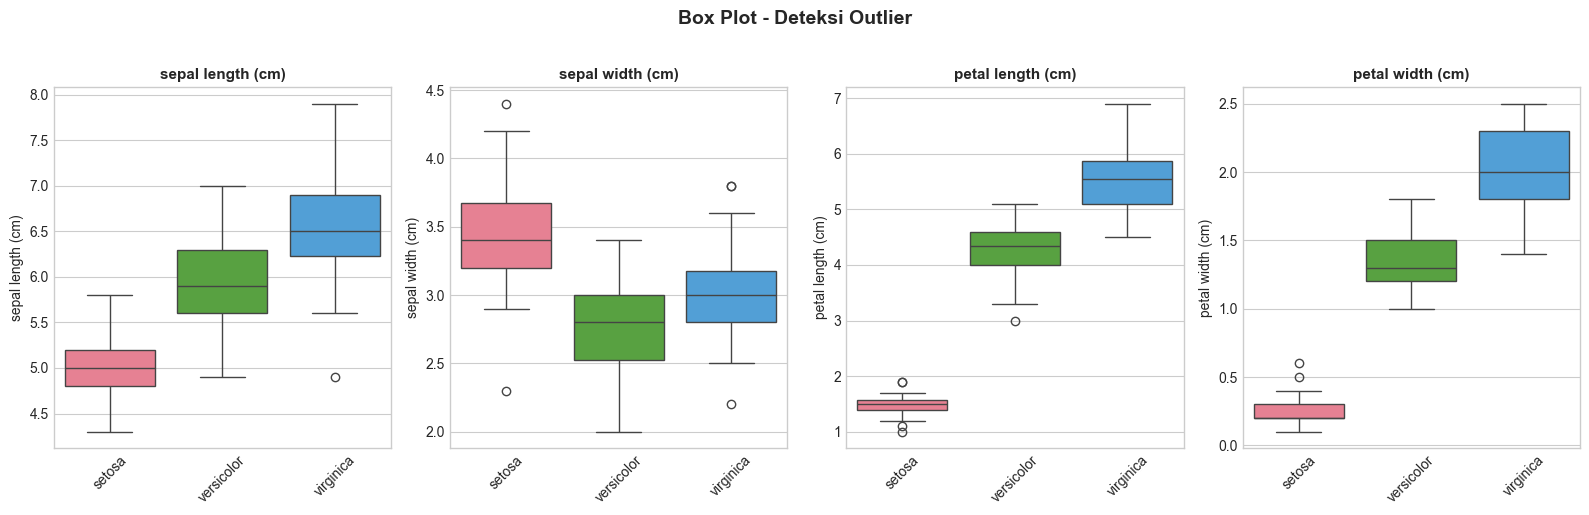

In [23]:
# Box plot untuk deteksi outlier
fig, axes = plt.subplots(1, 4, figsize=(16, 5))

for idx, col in enumerate(feature_cols):
    sns.boxplot(data=df, x='species', y=col, ax=axes[idx], palette='husl')
    axes[idx].set_title(f'{col}', fontsize=11, fontweight='bold')
    axes[idx].set_xlabel('')
    axes[idx].tick_params(axis='x', rotation=45)

plt.suptitle('Box Plot - Deteksi Outlier', fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

### 4.7 Correlation Analysis

📊 Correlation Matrix:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
sepal length (cm),1.000000,-0.117570,0.871754,0.817941,0.782561
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal length (cm),0.871754,-0.428440,1.000000,0.962865,0.949035
petal width (cm),0.817941,-0.366126,0.962865,1.000000,0.956547
target,0.782561,-0.426658,0.949035,0.956547,1.000000


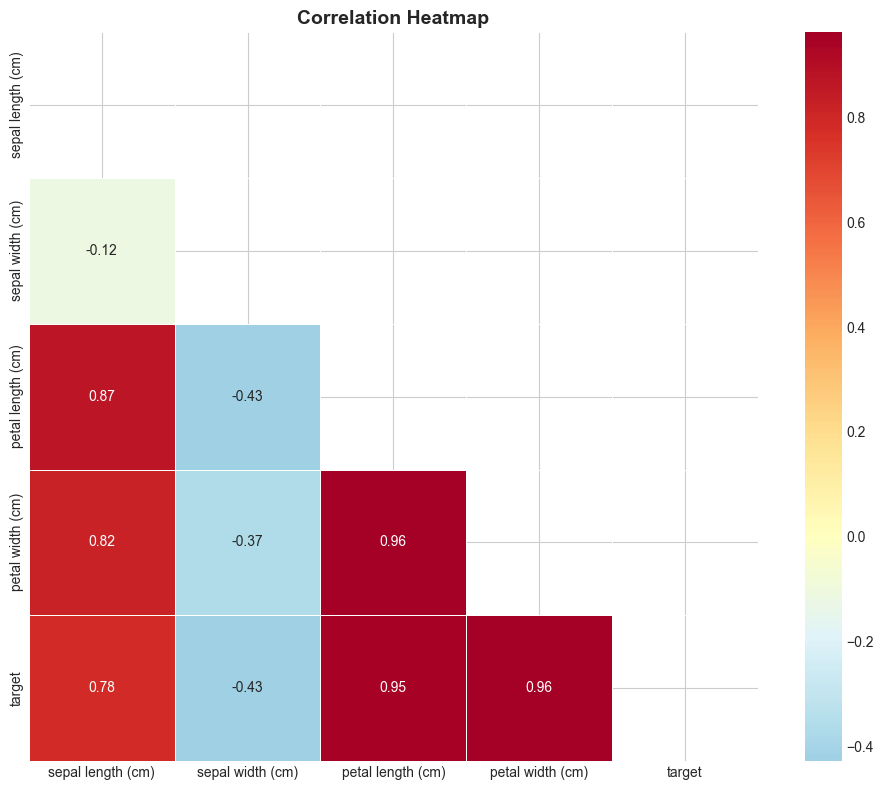

In [24]:
# Korelasi antar fitur numerik
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
correlation_matrix = df[numeric_cols].corr()

print("📊 Correlation Matrix:")
display(correlation_matrix)

# Heatmap
fig, ax = plt.subplots(figsize=(10, 8))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='RdYlBu_r', 
            center=0, square=True, linewidths=0.5, ax=ax,
            fmt='.2f', annot_kws={'size': 10})
ax.set_title('Correlation Heatmap', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

### 4.8 Pair Plot

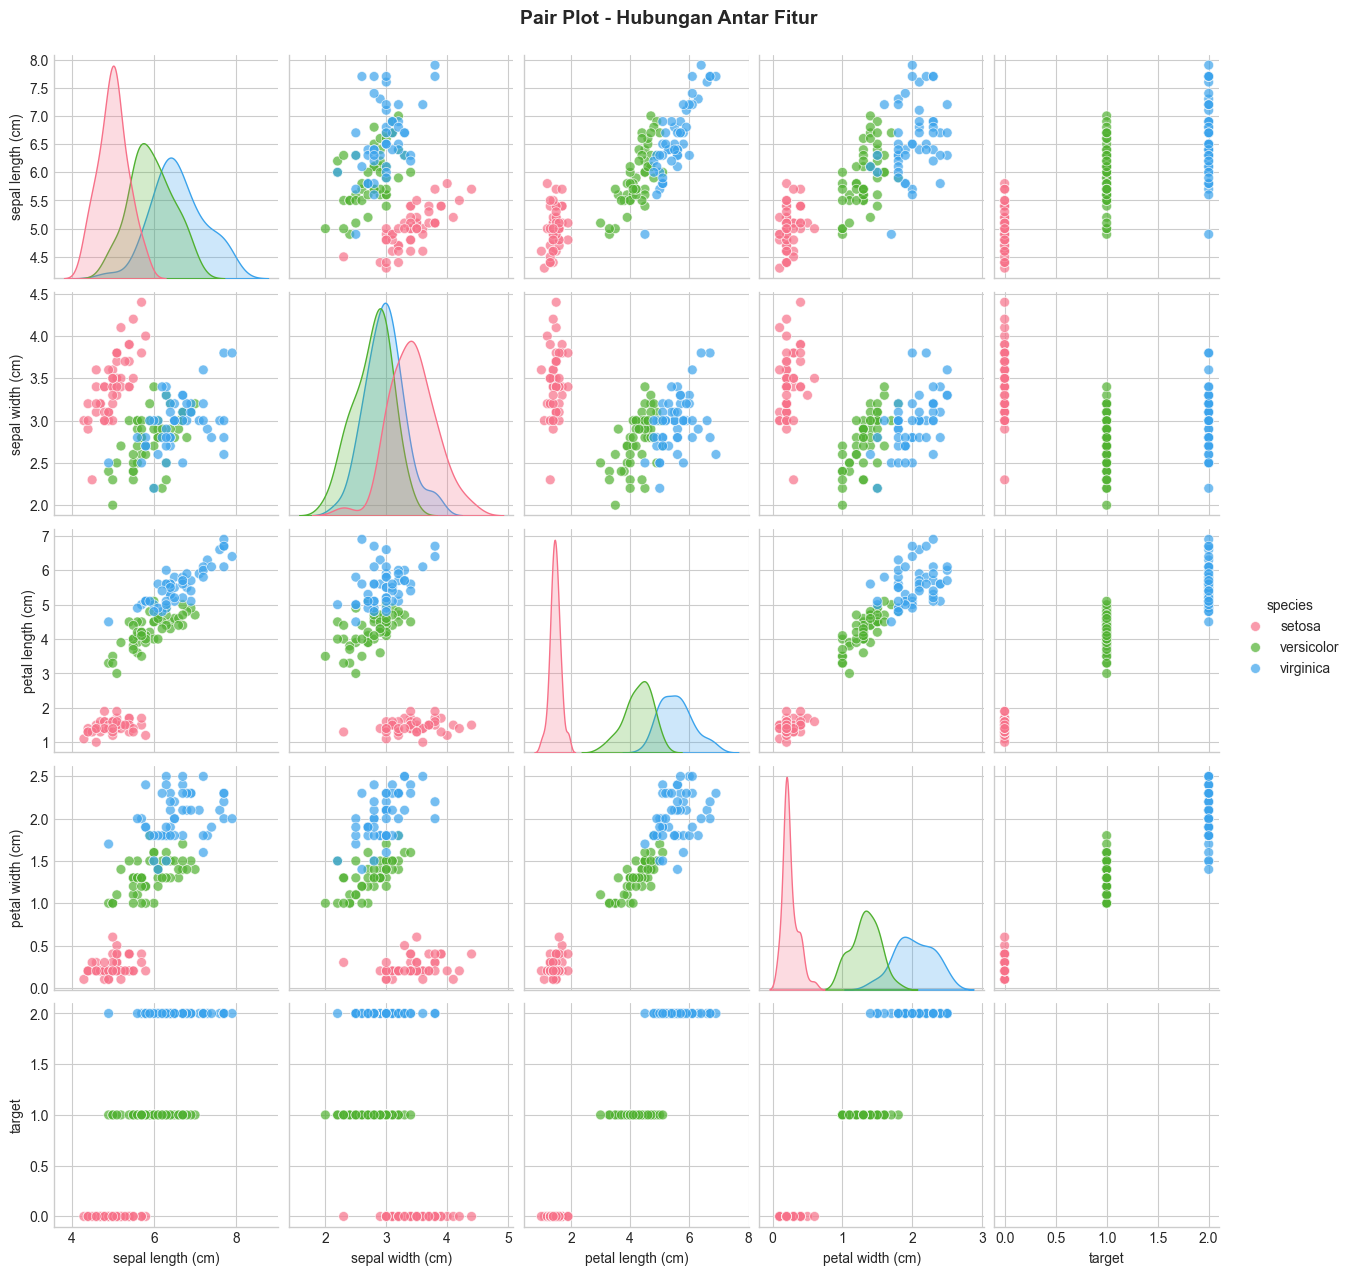

In [25]:
# Pair plot untuk melihat hubungan antar fitur
g = sns.pairplot(df, hue='species', palette='husl', diag_kind='kde',
                 plot_kws={'alpha': 0.7, 's': 50, 'edgecolor': 'white'},
                 diag_kws={'shade': True})
g.fig.suptitle('Pair Plot - Hubungan Antar Fitur', y=1.02, fontsize=14, fontweight='bold')
plt.show()

---
## 5. Data Preprocessing

Pada tahap ini, data preprocessing adalah **langkah penting** untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

### 5.1 Menghapus atau Menangani Data Kosong (Missing Values)

In [26]:
# Cek missing values
print("❓ Pengecekan Missing Values:")
print("="*50)
missing_before = df.isnull().sum().sum()
print(f"Jumlah missing values: {missing_before}")

# Jika ada missing values, tangani dengan median
feature_cols = list(iris.feature_names)
for col in feature_cols:
    if df[col].isnull().sum() > 0:
        median_val = df[col].median()
        df[col].fillna(median_val, inplace=True)
        print(f"  ↳ Mengisi missing values di '{col}' dengan median: {median_val:.4f}")

missing_after = df.isnull().sum().sum()
print(f"\n✅ Missing values setelah penanganan: {missing_after}")

❓ Pengecekan Missing Values:
Jumlah missing values: 0

✅ Missing values setelah penanganan: 0


### 5.2 Menghapus Data Duplikat

In [27]:
# Cek dan hapus data duplikat
print("🔄 Pengecekan Data Duplikat:")
print("="*50)
duplicates_before = df.duplicated().sum()
print(f"Jumlah data duplikat sebelum: {duplicates_before}")

# Hapus duplikat jika ada
if duplicates_before > 0:
    df = df.drop_duplicates()
    print(f"\n✅ Data duplikat berhasil dihapus")
else:
    print(f"\n✅ Tidak ada data duplikat")

print(f"Jumlah data setelah penghapusan: {len(df)}")

🔄 Pengecekan Data Duplikat:
Jumlah data duplikat sebelum: 1

✅ Data duplikat berhasil dihapus
Jumlah data setelah penghapusan: 149


### 5.3 Normalisasi atau Standarisasi Fitur

In [28]:
# Pisahkan fitur dan target
X = df[feature_cols].copy()
y = df['target'].copy()

print(f"📊 Shape Fitur: {X.shape}")
print(f"🎯 Shape Target: {y.shape}")

# Split data menjadi training dan testing (80:20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"\n📊 Training set: {X_train.shape[0]} sampel ({X_train.shape[0]/len(X)*100:.1f}%)")
print(f"📊 Test set: {X_test.shape[0]} sampel ({X_test.shape[0]/len(X)*100:.1f}%)")

📊 Shape Fitur: (149, 4)
🎯 Shape Target: (149,)

📊 Training set: 119 sampel (79.9%)
📊 Test set: 30 sampel (20.1%)


In [29]:
# Standarisasi fitur menggunakan StandardScaler
scaler = StandardScaler()

# Fit pada training data, transform pada training dan test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Konversi kembali ke DataFrame
X_train_scaled = pd.DataFrame(X_train_scaled, columns=feature_cols, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=feature_cols, index=X_test.index)

print("📊 Statistik Scaling (dari training set):")
print("="*50)
scaling_stats = pd.DataFrame({
    'Feature': feature_cols,
    'Mean': scaler.mean_,
    'Std': scaler.scale_
})
display(scaling_stats)

print("\n✅ Fitur berhasil distandardisasi menggunakan StandardScaler")

📊 Statistik Scaling (dari training set):


,Feature,Mean,Std
0,sepal length (cm),5.862185,0.840567
1,sepal width (cm),3.059664,0.442552
2,petal length (cm),3.762185,1.764019
3,petal width (cm),1.197479,0.760745



✅ Fitur berhasil distandardisasi menggunakan StandardScaler


In [30]:
# Preview data setelah scaling
print("📊 Preview Data Setelah Scaling:")
X_train_scaled.head()

📊 Preview Data Setelah Scaling:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
6,-1.501587,0.769031,-1.339093,-1.179737
128,0.639824,-0.586742,1.041834,1.186365
95,-0.192947,-0.134818,0.248192,0.003314
44,-0.906751,1.672881,-1.055649,-1.048287
30,-1.263653,0.091144,-1.225715,-1.311187


### 5.4 Deteksi dan Penanganan Outlier

In [31]:
# Deteksi outlier menggunakan metode IQR
print("🔍 Deteksi Outlier (Metode IQR):")
print("="*50)

def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return len(outliers), lower_bound, upper_bound

for col in feature_cols:
    n_outliers, lb, ub = detect_outliers_iqr(df, col)
    print(f"  {col}: {n_outliers} outliers (range: {lb:.2f} - {ub:.2f})")

print("\n📌 Catatan: Outlier pada dataset Iris umumnya merupakan variasi alami, sehingga tidak perlu dihapus.")

🔍 Deteksi Outlier (Metode IQR):
  sepal length (cm): 0 outliers (range: 3.15 - 8.35)
  sepal width (cm): 4 outliers (range: 2.05 - 4.05)
  petal length (cm): 0 outliers (range: -3.65 - 10.35)
  petal width (cm): 0 outliers (range: -1.95 - 4.05)

📌 Catatan: Outlier pada dataset Iris umumnya merupakan variasi alami, sehingga tidak perlu dihapus.


### 5.5 Encoding Data Kategorikal

In [32]:
# Encoding target class (sudah dalam bentuk numerik: 0, 1, 2)
print("🔢 Encoding Data Kategorikal:")
print("="*50)
print("Target sudah dalam bentuk numerik:")
print(f"  0 = {iris.target_names[0]}")
print(f"  1 = {iris.target_names[1]}")
print(f"  2 = {iris.target_names[2]}")

print("\n📊 Distribusi Target di Training Set:")
print(pd.Series(y_train.values).value_counts().sort_index())

print("\n📊 Distribusi Target di Test Set:")
print(pd.Series(y_test.values).value_counts().sort_index())

🔢 Encoding Data Kategorikal:
Target sudah dalam bentuk numerik:
  0 = setosa
  1 = versicolor
  2 = virginica

📊 Distribusi Target di Training Set:
0    40
1    40
2    39
Name: count, dtype: int64

📊 Distribusi Target di Test Set:
0    10
1    10
2    10
Name: count, dtype: int64


### 5.6 Menyimpan Data Hasil Preprocessing

In [33]:
import joblib

# Gabungkan fitur dan target untuk disimpan
train_data = X_train_scaled.copy()
train_data['target'] = y_train.values

test_data = X_test_scaled.copy()
test_data['target'] = y_test.values

# Simpan ke file CSV
train_data.to_csv('../data/processed/train_data.csv', index=False)
test_data.to_csv('../data/processed/test_data.csv', index=False)

# Simpan scaler untuk digunakan nanti
joblib.dump(scaler, '../data/processed/scaler.pkl')

print("✅ Data hasil preprocessing berhasil disimpan!")
print("  ↳ data/processed/train_data.csv")
print("  ↳ data/processed/test_data.csv")
print("  ↳ data/processed/scaler.pkl")

OSError: Cannot save file into a non-existent directory: '..\data\processed'

---
## 📋 Ringkasan Preprocessing

| Langkah | Status | Keterangan |
|---------|--------|------------|
| Missing Values | ✅ | Tidak ditemukan missing values |
| Data Duplikat | ✅ | Tidak ditemukan data duplikat |
| Feature Scaling | ✅ | StandardScaler (fit on train, transform on test) |
| Outlier Detection | ✅ | Ditemukan beberapa outlier, tidak dihapus (variasi alami) |
| Encoding | ✅ | Target sudah dalam numerik (0, 1, 2) |
| Train-Test Split | ✅ | 80% train, 20% test (stratified) |

### Output Files:
- `data/raw/iris_raw.csv` - Dataset mentah
- `data/processed/train_data.csv` - Data training hasil preprocessing
- `data/processed/test_data.csv` - Data testing hasil preprocessing
- `data/processed/scaler.pkl` - StandardScaler yang sudah di-fit